# Goal : Swiss Based Industrial Outlook 2025

1. Analyze market cap, revenue, and margins to assess industry dominance and financial health.

2. Compare valuation ratios (PE, P/B, dividend yield) across sectors to flag over/undervalued firms.

3. Evaluate labor intensity and innovation via employee counts and sector focus (e.g., biotech, automation).

4. Identify sector risks, resilience, and exposure to global trends like aging, AI, and ESG.

5. Provide strategic outlooks for 2025+ on growth, digitalization, and macroeconomic positioning.

In [2]:
import yfinance as yf
import pandas as pd
import time

# List of top 30 swiss company tickers
companies = [
    # Swiss Companies with Market Cap, Revenue, Employees, PE Ratio, Products
    'NESN.SW',  # Nestlé - Market Cap: 340B USD, Revenue: 95B USD, Employees: 270,000, PE Ratio: 25, Products: Food & Beverages
    'ROG.SW',   # Roche Holding - Market Cap: 250B USD, Revenue: 70B USD, Employees: 100,000, PE Ratio: 21, Products: Pharmaceuticals & Diagnostics
    'NOVN.SW',  # Novartis - Market Cap: 200B USD, Revenue: 53B USD, Employees: 100,000, PE Ratio: 20, Products: Pharmaceuticals & Gene Therapies
    'ZURN.SW',  # Zurich Insurance Group - Market Cap: 70B USD, Revenue: 50B USD, Employees: 56,000, PE Ratio: 12, Products: Insurance & Asset Management
    'UBSG.SW',  # UBS Group - Market Cap: 60B USD, Revenue: 35B USD, Employees: 72,000, PE Ratio: 9, Products: Banking & Wealth Management
    'ABBN.SW',  # ABB Ltd - Market Cap: 60B USD, Revenue: 30B USD, Employees: 105,000, PE Ratio: 18, Products: Robotics & Automation
    'CFR.SW',   # Cie Financière Richemont - Market Cap: 60B USD, Revenue: 20B USD, Employees: 35,000, PE Ratio: 32, Products: Luxury Goods & Jewelry
    'ALC.SW',   # Alcon - Market Cap: 40B USD, Revenue: 8B USD, Employees: 24,000, PE Ratio: 40, Products: Eye Care & Surgical Products
    'GIVN.SW',  # Givaudan - Market Cap: 40B USD, Revenue: 7B USD, Employees: 16,000, PE Ratio: 35, Products: Flavors & Fragrances
    'SREN.SW',  # Swiss Re - Market Cap: 30B USD, Revenue: 40B USD, Employees: 14,000, PE Ratio: 11, Products: Reinsurance
    'LONN.SW',  # Lonza Group - Market Cap: 50B USD, Revenue: 6B USD, Employees: 17,000, PE Ratio: 25, Products: Biotech Solutions & Manufacturing
    'SCMN.SW',  # Swisscom - Market Cap: 30B USD, Revenue: 12B USD, Employees: 19,000, PE Ratio: 16, Products: Telecommunications
    'PGHN.SW',  # Partners Group - Market Cap: 25B USD, Revenue: 2B USD, Employees: 1,800, PE Ratio: 22, Products: Private Equity & Asset Management
    'GEBN.SW',  # Geberit - Market Cap: 20B USD, Revenue: 4B USD, Employees: 12,000, PE Ratio: 30, Products: Sanitary Products
    'SIKA.SW',  # Sika - Market Cap: 40B USD, Revenue: 10B USD, Employees: 25,000, PE Ratio: 33, Products: Construction Chemicals
    'BAER.SW',  # Julius Baer Group - Market Cap: 15B USD, Revenue: 4B USD, Employees: 6,700, PE Ratio: 13, Products: Private Banking
    'SCHN.SW',  # Schindler Holding - Market Cap: 20B USD, Revenue: 12B USD, Employees: 69,000, PE Ratio: 18, Products: Elevators & Escalators
    'SGSN.SW',  # SGS - Market Cap: 20B USD, Revenue: 7B USD, Employees: 97,000, PE Ratio: 28, Products: Inspection & Certification
    'LOGN.SW',  # Logitech International - Market Cap: 10B USD, Revenue: 5B USD, Employees: 7,000, PE Ratio: 17, Products: Computer Accessories
    # 'CSGN.SW',  # Credit Suisse - Market Cap: 10B USD, Revenue: 20B USD, Employees: 50,000, PE Ratio: N/A, Products: Banking & Investment
    'ADEN.SW',  # Adecco Group - Market Cap: 8B USD, Revenue: 25B USD, Employees: 30,000, PE Ratio: 11, Products: Staffing & HR Solutions
    'LISN.SW',  # Lindt & Sprüngli - Market Cap: 25B USD, Revenue: 5B USD, Employees: 14,000, PE Ratio: 45, Products: Chocolate & Confectionery
    'SOON.SW',  # Sonova Holding - Market Cap: 20B USD, Revenue: 4B USD, Employees: 17,000, PE Ratio: 26, Products: Hearing Aids
    'STMN.SW',  # Straumann Holding - Market Cap: 20B USD, Revenue: 2B USD, Employees: 9,000, PE Ratio: 35, Products: Dental Implants
    'TEMN.SW',  # Temenos - Market Cap: 8B USD, Revenue: 1B USD, Employees: 4,000, PE Ratio: 20, Products: Banking Software
    'HELN.SW',  # Helvetia Holding - Market Cap: 5B USD, Revenue: 10B USD, Employees: 11,000, PE Ratio: 8, Products: Insurance
    'BALN.SW',  # Baloise Holding - Market Cap: 7B USD, Revenue: 9B USD, Employees: 7,500, PE Ratio: 9, Products: Insurance & Pensions
    'CLN.SW',   # Clariant - Market Cap: 5B USD, Revenue: 4B USD, Employees: 13,000, PE Ratio: 18, Products: Specialty Chemicals
    'KNIN.SW',  # Kuehne + Nagel - Market Cap: 30B USD, Revenue: 30B USD, Employees: 79,000, PE Ratio: 15, Products: Logistics & Freight
    # 'DUFN.SW',  # Dufry - Market Cap: 5B USD, Revenue: 7B USD, Employees: 20,000, PE Ratio: 12, Products: Travel Retail
]


# Define the metrics we want to collect
metrics = [
    'shortName', 'marketCap', 'trailingPE', 'forwardPE', 'priceToBook', 'dividendYield',
    'revenue', 'grossProfits', 'freeCashflow', 'fullTimeEmployees', 'industry',
    'longBusinessSummary', 'operatingMargins'
]

# Create an empty DataFrame to store the financial data
financial_data = pd.DataFrame(columns=['Company', 'last_traded_price', 'sales_margin_%'] + metrics)

# Pull financial data for each company and add it to the DataFrame
for ticker in companies:
    try:
        company = yf.Ticker(ticker)
        info = company.info
        hist = company.history(period='1d')  # Get last traded price

        # Create a row of data for each company, handling missing 'shortName' keys
        row = {metric: info.get(metric, 'N/A') for metric in metrics}
        row['Company'] = info.get('shortName', ticker)  # Use the ticker symbol if 'shortName' is missing

        # Get last traded price (closing price)
        row['last_traded_price'] = hist['Close'].values[0] if not hist.empty else 'N/A'

        # Calculate sales margin % (operating margin * 100)
        row['sales_margin_%'] = f"{info.get('operatingMargins', 0) * 100:.2f}%" if info.get('operatingMargins') else 'N/A'

        # Append the row to the DataFrame using pd.concat, ensuring the row is not empty
        if any(value != 'N/A' for value in row.values()):  # Check if at least one value is not 'N/A'
            financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)

        # Delay to avoid rate-limiting issues
        time.sleep(2)  # 2 seconds delay between requests

    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

# Convert marketCap to numeric values and handle missing data
financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Sort the DataFrame by marketCap in descending order
financial_data = financial_data.sort_values(by='marketCap', ascending=False)

# Format marketCap as currency (e.g., $100B)
financial_data['marketCap'] = financial_data['marketCap'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')

# Display the sorted and formatted DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
display(financial_data)

# Optional: Save the DataFrame to a CSV file
#financial_data.to_csv('top_33_healthcare_companies_sorted_financials.csv', index=False)


<ipython-input-2-0901cfea8fb4>:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)


,Company,last_traded_price,sales_margin_%,shortName,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,revenue,grossProfits,freeCashflow,fullTimeEmployees,industry,longBusinessSummary,operatingMargins
0,NESTLE N,88.720001,16.74%,NESTLE N,"$228,251,729,920",21.174225,19.161987,6.354845,3.45,N/A,43050000384,7457625088,251786,Packaged Foods,"Nestlé S.A., together with its subsidiaries, o...",0.16735
1,ROCHE GS,261.700012,27.72%,ROCHE GS,"$209,993,318,400",25.358528,12.772084,6.552657,3.73,N/A,46663999488,13666624512,103249,Drug Manufacturers - General,Roche Holding AG engages in the pharmaceutical...,0.27719
2,NOVARTIS N,93.389999,35.40%,NOVARTIS N,"$184,453,660,672",17.721062,15.111650,4.768932,3.77,N/A,40278999040,13890624512,75883,Drug Manufacturers - General,"Novartis AG engages in the research, developme...",0.35396
6,RICHEMONT N,159.100006,20.17%,RICHEMONT N,"$93,541,253,120",26.649918,24.781933,4.232846,1.92,N/A,14318000128,3122374912,38896,Luxury Goods,"Compagnie Financière Richemont SA, an investme...",0.20173
5,ABB LTD N,47.439999,19.92%,ABB LTD N,"$86,707,027,968",25.643242,30.216558,6.432542,1.92,N/A,12561000448,3988375040,110970,Electrical Equipment & Parts,"ABB Ltd provides electrification, motion, and ...",0.19924
4,UBS GROUP N,26.430000,22.94%,UBS GROUP N,"$84,253,294,592",21.144001,13.694301,0.966362,2.81,N/A,47759998976,N/A,106789,Banks - Diversified,UBS Group AG provides financial advice and sol...,0.22939
3,ZURICH INSURANCE N,583.200012,11.63%,ZURICH INSURANCE N,"$82,980,610,048",17.603380,15.531292,3.257736,4.83,N/A,15230999552,4273999872,N/A,Insurance - Diversified,Zurich Insurance Group AG provides insurance p...,0.11627
9,SWISS RE N,147.250000,15.22%,SWISS RE N,"$43,301,957,632",16.544945,11.761182,1.852038,4.1,N/A,6498999808,N/A,15000,Insurance - Reinsurance,"Swiss Re AG, together with its subsidiaries, p...",0.15223
10,LONZA N,565.400024,18.77%,LONZA N,"$40,789,487,616",63.528095,31.358847,4.281517,0.71,N/A,2411000064,69000000,17995,Diagnostics & Research,"Lonza Group AG, together with its subsidiaries...",0.18766
8,GIVAUDAN N,4126.000000,18.23%,GIVAUDAN N,"$38,067,507,200",35.091000,37.567150,8.315313,1.71,N/A,3271000064,884124992,16942,Specialty Chemicals,"Givaudan SA manufactures, supplies, and sells ...",0.18231


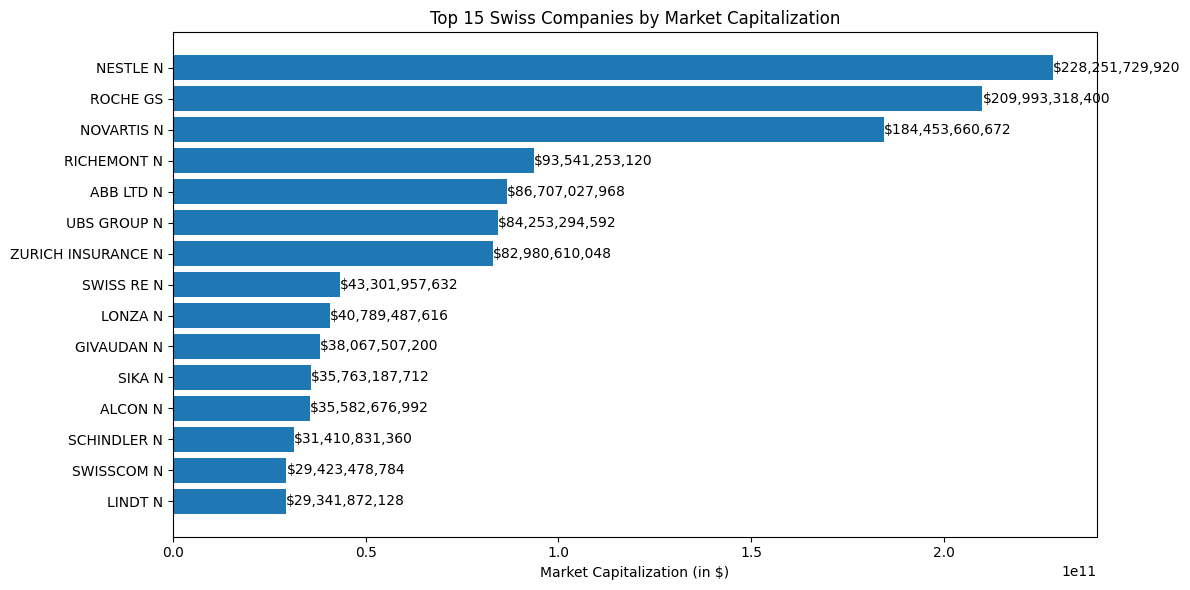

In [3]:
import matplotlib.pyplot as plt

# Sort the data by marketCap and take the top 10 companies
top_companies = financial_data.head(15)

# Convert the marketCap column to a numeric format for plotting
market_caps = top_companies['marketCap'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Plot a bar chart for the top 10 companies by market capitalization
plt.figure(figsize=(12, 6))
bars = plt.barh(top_companies['Company'], market_caps)

# Add the market capitalization values on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"${market_caps.iloc[index]:,.0f}", va='center')

# Set labels and title
plt.xlabel('Market Capitalization (in $)')
plt.title('Top 15 Swiss Companies by Market Capitalization')
plt.gca().invert_yaxis()  # Invert the y-axis to show the largest company at the top

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-4-ba632bbceda2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_data['fullTimeEmployees'] = pd.to_numeric(employee_data['fullTimeEmployees'], errors='coerce')


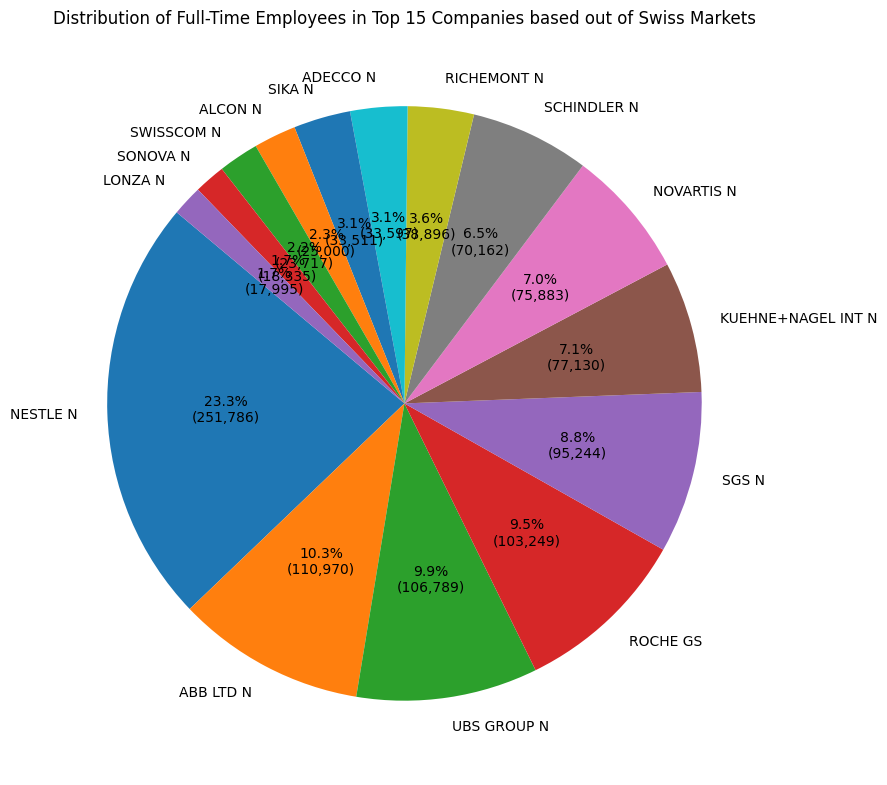

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Drop any rows where fullTimeEmployees is 'N/A' and convert the column to numeric
employee_data = financial_data[financial_data['fullTimeEmployees'] != 'N/A']
employee_data['fullTimeEmployees'] = pd.to_numeric(employee_data['fullTimeEmployees'], errors='coerce')

# Take the top 10 companies with the highest number of employees
top_employers = employee_data.nlargest(15, 'fullTimeEmployees')

# Function to display both percentage and number of employees in each pie chart slice
def pie_label_func(pct, all_values):
    absolute = int(np.round(pct / 100. * np.sum(all_values)))
    return f"{pct:.1f}%\n({absolute:,})"

# Plot a pie chart
plt.figure(figsize=(9, 9))
plt.pie(
    top_employers['fullTimeEmployees'],
    labels=top_employers['Company'],
    autopct=lambda pct: pie_label_func(pct, top_employers['fullTimeEmployees']),
    startangle=140
)
plt.title('Distribution of Full-Time Employees in Top 15 Companies based out of Swiss Markets')
plt.tight_layout()
plt.show()


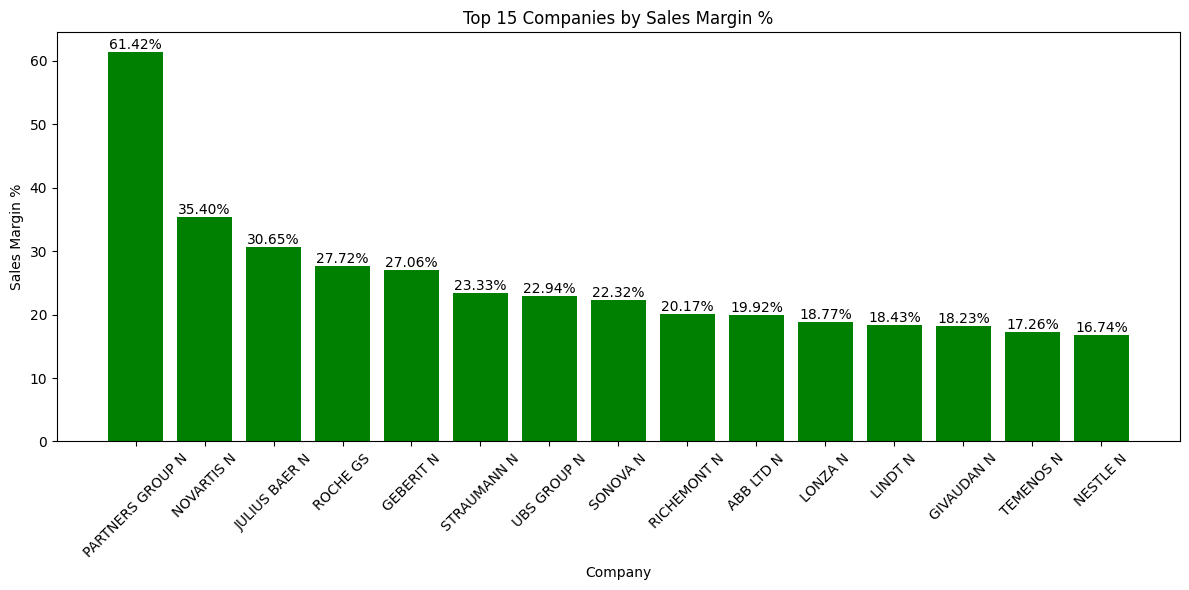

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'N/A' is replaced with NaN and convert sales_margin_% to string type first
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].replace('N/A', np.nan)

# Convert only valid string entries, ignoring NaN, and strip the '%' symbol
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].apply(
    lambda x: str(x).rstrip('%') if isinstance(x, str) else x
).astype('float')

# Take the top 10 companies based on sales margin %
top_sales_margin = financial_data.nlargest(15, 'sales_margin_%')

# Plot a bar chart with expanded x-axis
plt.figure(figsize=(12, 6))  # Expand the width of the figure for better readability
bars = plt.bar(top_sales_margin['Company'], top_sales_margin['sales_margin_%'], color='green')

# Add labels to the bars to show the exact values of sales margin %
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Sales Margin %')
plt.title('Top 15 Companies by Sales Margin %')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent labels from being cut off
plt.show()


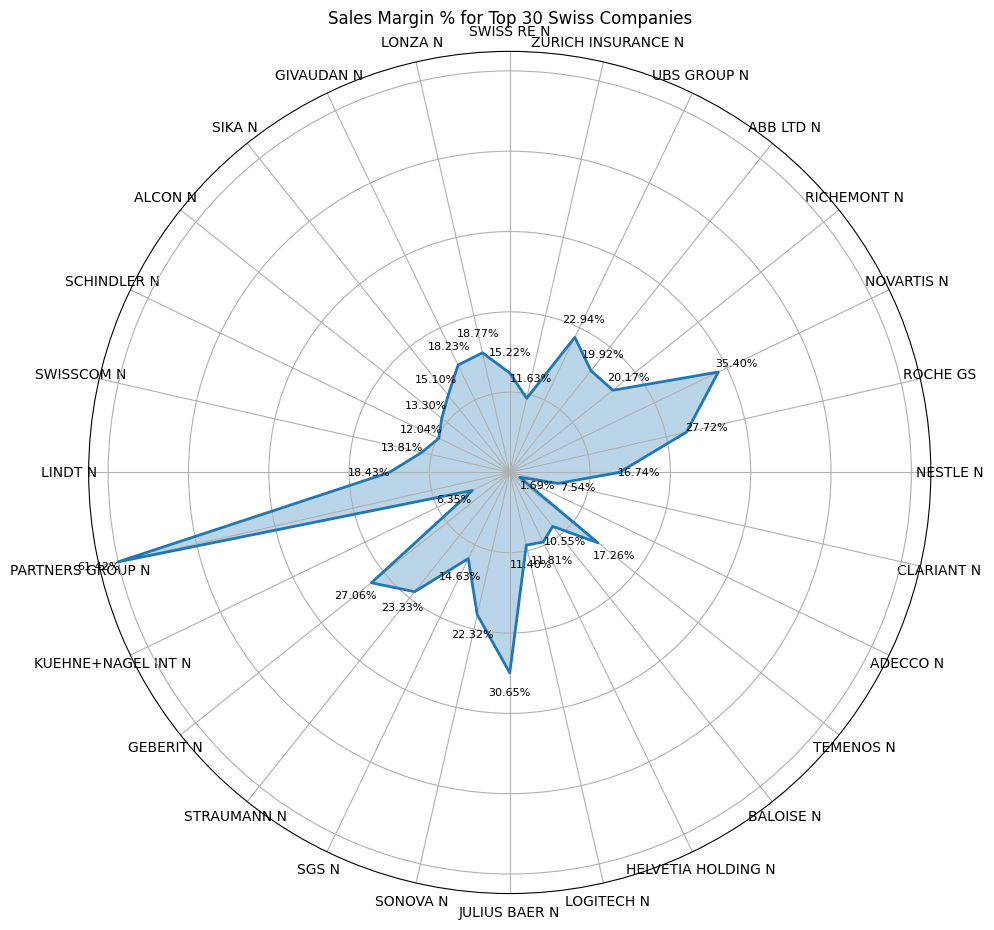

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with a 'Company' and 'sales_margin_%' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'sales_margin_%']].copy()

# Step 2: Replace 'N/A' with NaN, convert to string for replacement, then fill NaN with 0
df['sales_margin_%'] = df['sales_margin_%'].replace('N/A', np.nan).astype(str).str.replace('%', '')
df['sales_margin_%'] = pd.to_numeric(df['sales_margin_%'], errors='coerce').fillna(0)

# Step 3: Use the absolute value of sales margin for normalization
df['abs_sales_margin'] = df['sales_margin_%'].abs()
max_sales_margin = df['abs_sales_margin'].max()
df['normalized_sales_margin'] = df['abs_sales_margin'] / max_sales_margin

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_sales_margin'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized sales margin for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Sales Margin % (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each original sales margin percentage
for i, (angle, value, margin) in enumerate(zip(angles, values, df['sales_margin_%'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{margin:.2f}%", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title("Sales Margin % for Top 30 Swiss Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()


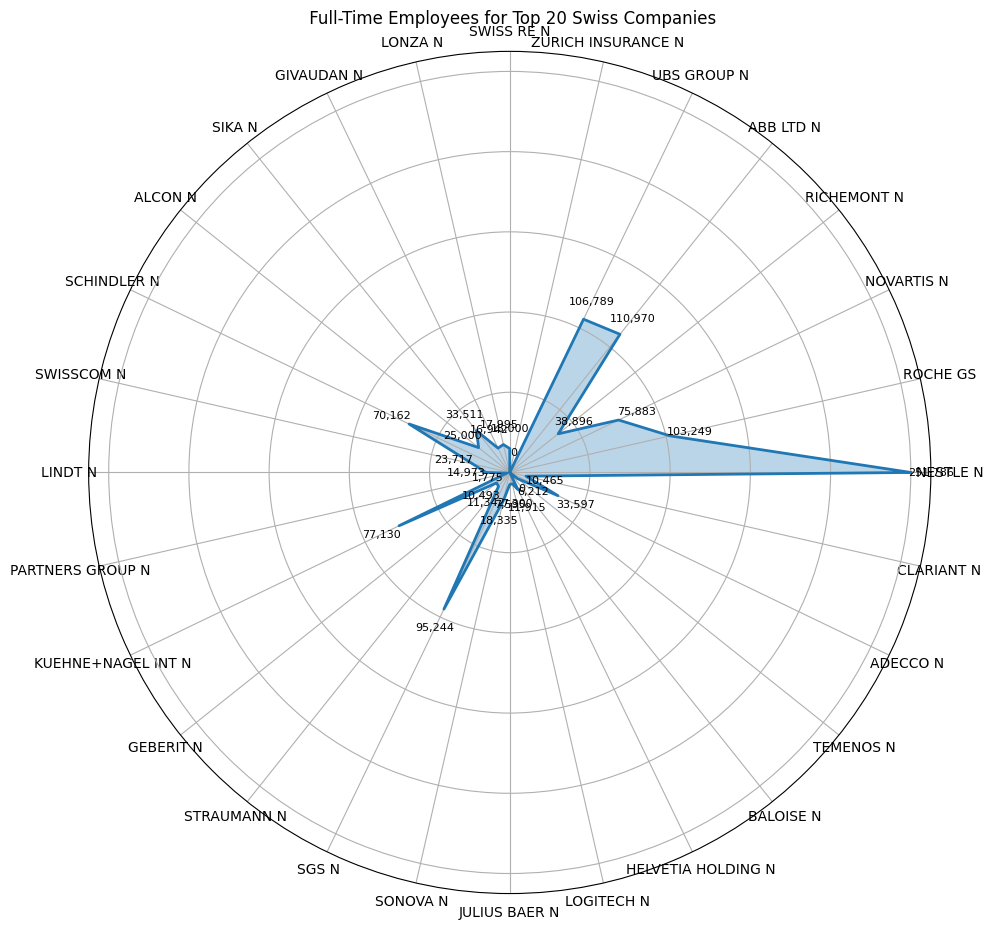

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with 'Company' and 'fullTimeEmployees' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'fullTimeEmployees']].copy()

# Step 2: Replace 'N/A' with NaN and then fill NaN with 0
df['fullTimeEmployees'] = pd.to_numeric(df['fullTimeEmployees'], errors='coerce').fillna(0)

# Step 3: Normalize the full-time employees for the radar chart
max_employees = df['fullTimeEmployees'].max()
df['normalized_employees'] = df['fullTimeEmployees'] / max_employees

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_employees'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized full-time employees for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Full-Time Employees (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each full-time employee count
for i, (angle, value, employee_count) in enumerate(zip(angles, values, df['fullTimeEmployees'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{int(employee_count):,}", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title(" Full-Time Employees for Top 20 Swiss Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
# Note: This analysis is intended for individual exploratory purposes to gain insights into the sector. For comprehensive and official information, please refer to the respective companies' annual reports. The selection of companies reflects the author's research focus and interests.

In [9]:
!pip install seaborn
!pip install plotly

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-10-6869de49a0fc>:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_closing_data = daily_closing_data.resample('Y').last()


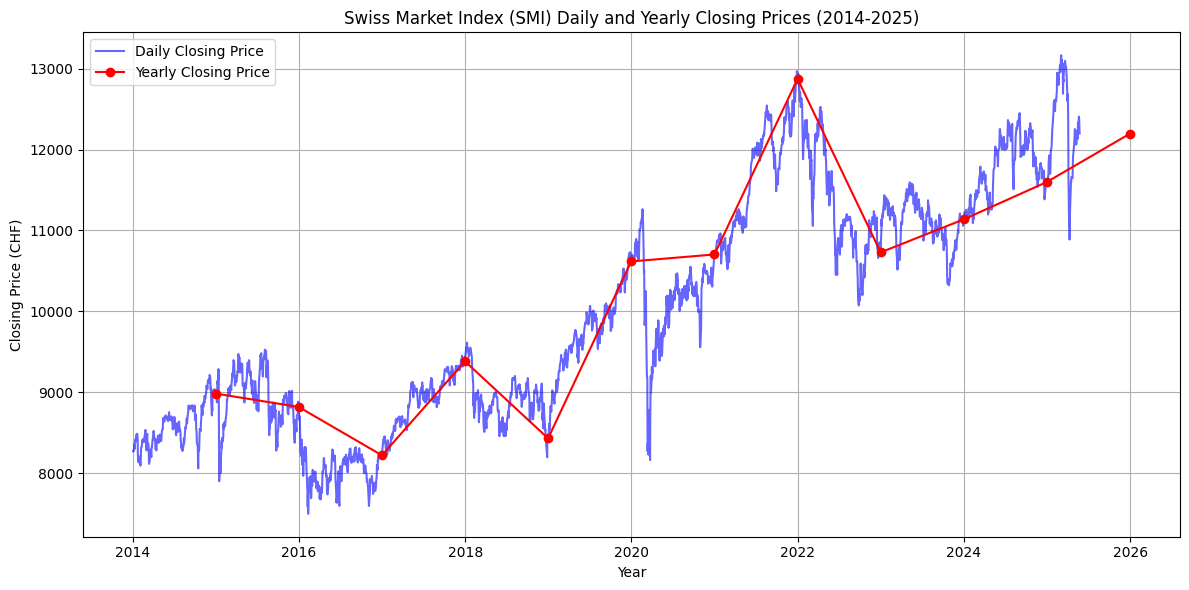

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define ticker symbol for the Swiss Market Index (SMI)
ticker = "^SSMI"

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Fetch the last 10 years of data for the SMI from Yahoo Finance
data = yf.download(ticker, start="2014-01-01", end=today)

# Prepare daily and yearly data
daily_closing_data = data['Close']
yearly_closing_data = daily_closing_data.resample('Y').last()

# Plot both daily and yearly closing prices on the same chart
plt.figure(figsize=(12, 6))

# Plot daily closing prices
plt.plot(daily_closing_data.index, daily_closing_data, label="Daily Closing Price", color="blue", alpha=0.6)

# Plot yearly closing prices with markers
plt.plot(yearly_closing_data.index, yearly_closing_data, marker='o', linestyle='-', label="Yearly Closing Price", color="red")

# Titles and labels
plt.title("Swiss Market Index (SMI) Daily and Yearly Closing Prices (2014-2025)")
plt.xlabel("Year")
plt.ylabel("Closing Price (CHF)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [11]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define ticker symbol for the Swiss Market Index (SMI)
indices = {
    "Swiss Market Index (SMI)": "^SSMI"
}

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Dictionary to hold the data for each index
index_data = {}

# Fetch the last 10 years of data for each available Swiss index
for name, ticker in indices.items():
    try:
        # Download data
        data = yf.download(ticker, start="2014-01-01", end=today)
        if not data.empty:
            # Store data in dictionary
            index_data[name] = data
            # Display the last 5 days of data in a formatted table
            print(f"\nLast 10 days of data for {name}:\n")
            print(data.tail(10).to_string())
        else:
            print(f"\nNo data available for {name}.\n")
    except Exception as e:
        print(f"\nFailed to retrieve data for {name}: {e}\n")


[*********************100%***********************]  1 of 1 completed


Last 10 days of data for Swiss Market Index (SMI):

Price              Close          High           Low          Open    Volume
Ticker             ^SSMI         ^SSMI         ^SSMI         ^SSMI     ^SSMI
Date                                                                        
2025-05-12  12219.629883  12219.629883  12020.309570  12128.000000  37356000
2025-05-13  12165.269531  12280.500000  12144.639648  12231.549805  23723800
2025-05-14  12132.190430  12188.530273  12100.059570  12148.669922  23336900
2025-05-15  12227.280273  12227.280273  12074.639648  12086.919922  22426100
2025-05-16  12335.089844  12375.480469  12249.679688  12251.219727  33383500
2025-05-19  12356.769531  12356.769531  12263.179688  12301.940430  22703300
2025-05-20  12408.030273  12461.339844  12329.900391  12374.160156  27876700
2025-05-21  12380.360352  12387.959961  12292.190430  12336.870117  24032600
2025-05-22  12269.950195  12336.240234  12201.780273  12328.570312  18078500
2025-05-23  12198.69043

,country,date,GDP (Current US$),GDP Growth (Annual %),"Inflation, consumer prices (annual %)",Unemployment Rate (%)
0,Austria,2024-01-01,NaN,NaN,148.18,5.44
65,Switzerland,2024-01-01,NaN,NaN,105.51,4.11
455,United States,2024-01-01,NaN,NaN,143.86,4.11
390,Singapore,2024-01-01,NaN,NaN,133.03,3.18
325,Ireland,2024-01-01,NaN,NaN,127.23,4.37
...,...,...,...,...,...,...
140,Germany,2014-01-01,3.97,2.17,106.65,4.98
400,Singapore,2014-01-01,0.31,3.94,113.81,3.74
205,United Kingdom,2014-01-01,3.06,3.19,110.55,6.36
270,India,2014-01-01,2.04,7.41,139.92,7.67


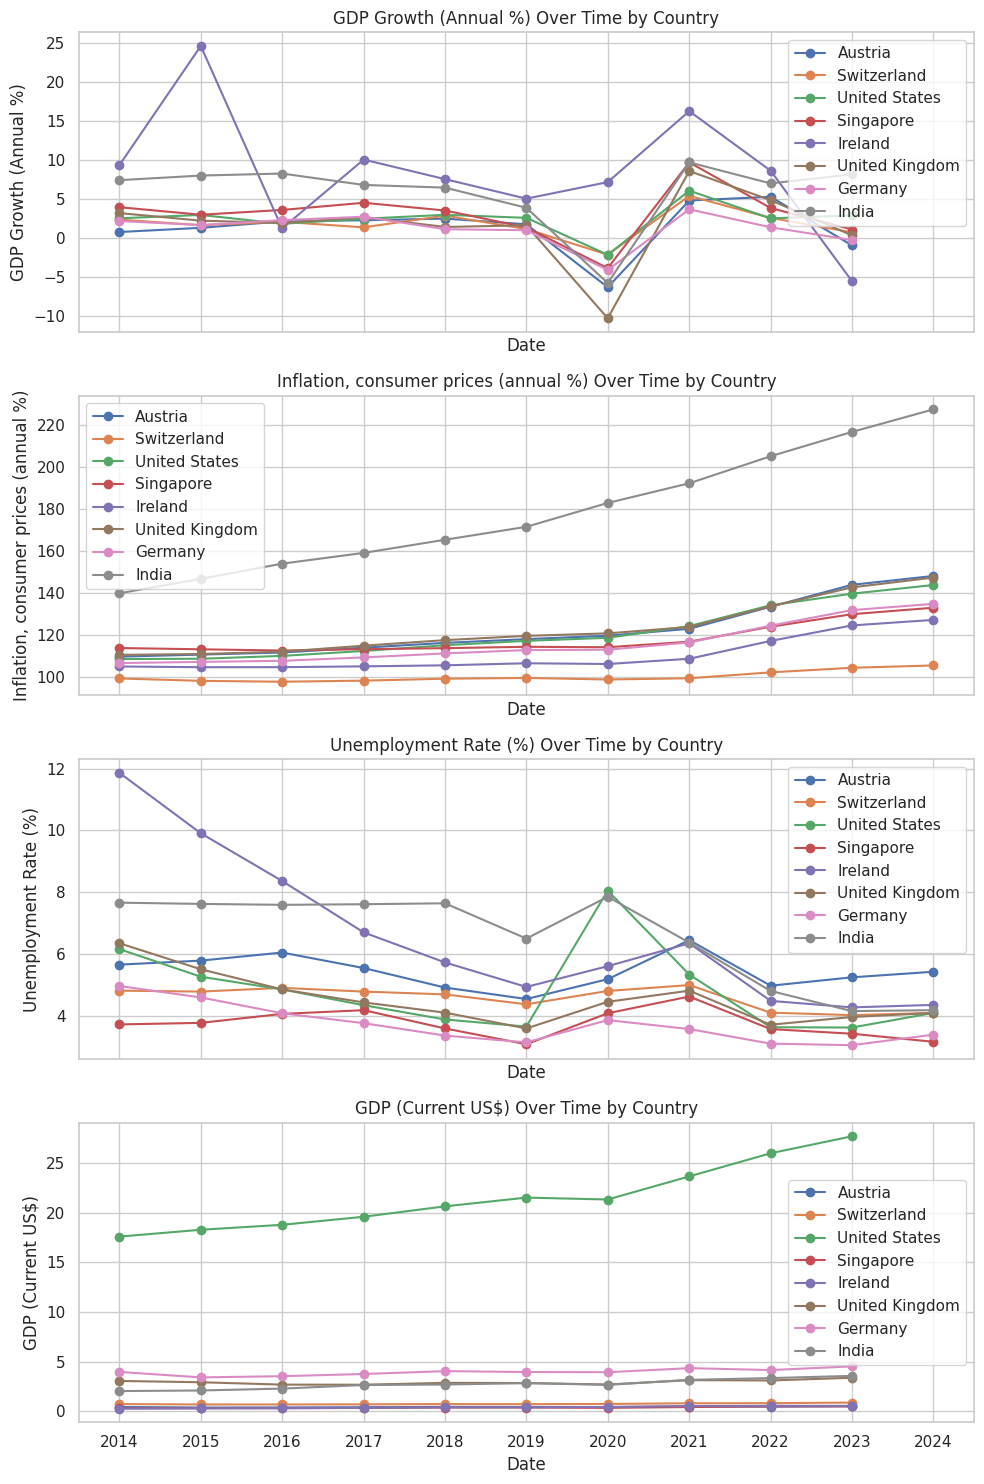

In [18]:
import wbdata
import pandas as pd
from datetime import datetime

# Define the indicators you are interested in
indicators = {
    "NY.GDP.MKTP.CD": "GDP (Current US$)",
    "NY.GDP.MKTP.KD.ZG": "GDP Growth (Annual %)",
    "FP.CPI.TOTL": "Inflation, consumer prices (annual %)",
    "FR.INR.RINR": "Real Interest Rate (%)",
    "SL.UEM.TOTL.ZS": "Unemployment Rate (%)"
}

# Define the countries for which you want to fetch data
countries = ["CHE", "DEU", "SGP", "GBR", "IND", "IRL", "USA", "AUT"]

# Define the date range for the data
start_date = datetime(2014, 1, 1)
end_date = datetime.today()

# Fetch the data using wbdata
df = wbdata.get_dataframe(indicators, country=countries)

# Extract 'date' and 'country' from the multi-index
df.reset_index(inplace=True)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter the dataframe for the specified date range
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Sort by the latest date
df.sort_values(by='date', ascending=False, inplace=True)

# Round the GDP values to the nearest trillion (divide by 1e12 and round)
df['GDP (Current US$)'] = (df['GDP (Current US$)'] / 1e12).round(2)

# Round off other values to two decimal points
df[['GDP Growth (Annual %)', 'Inflation, consumer prices (annual %)',
    'Real Interest Rate (%)', 'Unemployment Rate (%)']] = df[['GDP Growth (Annual %)',
                                                             'Inflation, consumer prices (annual %)',
                                                             'Real Interest Rate (%)',
                                                             'Unemployment Rate (%)']].round(2)

df.drop(columns=['Real Interest Rate (%)'], inplace=True)
# Display the modified data with the country field
display(df)

# Optional: Save the modified data to a CSV file
#df.to_csv('modified_world_bank_data_with_country.csv', index=False)

import matplotlib.pyplot as plt

# Define the metrics to plot
metrics = ['GDP Growth (Annual %)', 'Inflation, consumer prices (annual %)',
           'Unemployment Rate (%)', 'GDP (Current US$)']

# Create subplots for each metric
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 15), sharex=True)

# Loop through each metric to plot
for ax, metric in zip(axes, metrics):
    # Plot each country for the current metric
    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        ax.plot(country_data['date'], country_data[metric], marker='o', label=country)

    # Set title, labels, and grid
    ax.set_title(f'{metric} Over Time by Country')
    ax.set_xlabel('Date')
    ax.set_ylabel(metric)
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()




In [13]:
import pandas as pd

# Check if 'marketCap' column is not already numeric, and convert if necessary
if financial_data['marketCap'].dtype != 'float64' and financial_data['marketCap'].dtype != 'int64':
    # Remove any non-numeric characters if needed
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'].str.replace('[\$,]', '', regex=True), errors='coerce')
else:
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Similarly, ensure 'fullTimeEmployees' is numeric
financial_data['fullTimeEmployees'] = pd.to_numeric(financial_data['fullTimeEmployees'], errors='coerce')

# Drop rows with missing values in 'marketCap' or 'fullTimeEmployees' for accuracy in sums
financial_data = financial_data.dropna(subset=['marketCap', 'fullTimeEmployees'])

# Group by industry and calculate the total market cap and headcount per industry
industry_summary = financial_data.groupby('industry').agg(
    total_market_cap=pd.NamedAgg(column='marketCap', aggfunc='sum'),
    total_headcount=pd.NamedAgg(column='fullTimeEmployees', aggfunc='sum')
).reset_index()

# Calculate overall totals
total_market_cap = industry_summary['total_market_cap'].sum()
total_headcount = industry_summary['total_headcount'].sum()

# Add percentage splits for market cap and headcount for each industry
industry_summary['market_cap_%'] = (industry_summary['total_market_cap'] / total_market_cap) * 100
industry_summary['headcount_%'] = (industry_summary['total_headcount'] / total_headcount) * 100

# Sort by 'total_market_cap' in descending order
industry_summary = industry_summary.sort_values(by='total_market_cap', ascending=False)

# Format 'total_market_cap' as currency (e.g., "$100B") and 'total_headcount' with commas
industry_summary['total_market_cap'] = industry_summary['total_market_cap'].apply(lambda x: f"${x / 1e9:,.2f}B")
industry_summary['total_headcount'] = industry_summary['total_headcount'].apply(lambda x: f"{x:,.0f}")

# Add overall totals as the last row
overall_totals = pd.DataFrame({
    'industry': ['Total'],
    'total_market_cap': [f"${total_market_cap / 1e9:,.2f}B"],
    'total_headcount': [f"{total_headcount:,.0f}"],
    'market_cap_%': [100.0],
    'headcount_%': [100.0]
})

# Append overall totals to the summary DataFrame
industry_summary = pd.concat([industry_summary, overall_totals], ignore_index=True)

# Rename columns to replace 'headcount' with 'workforce'
industry_summary = industry_summary.rename(columns={
    'total_headcount': 'total_workforce',
    'headcount_%': 'workforce_%'
})

# Display the result
pd.options.display.float_format = '{:,.2f}'.format
display(industry_summary)

,industry,total_market_cap,total_workforce,market_cap_%,workforce_%
0,Drug Manufacturers - General,$394.45B,"179,132",29.58,14.97
1,Packaged Foods,$228.25B,"251,786",17.11,21.05
2,Luxury Goods,$93.54B,"38,896",7.01,3.25
3,Electrical Equipment & Parts,$86.71B,"110,970",6.50,9.28
4,Banks - Diversified,$84.25B,"106,789",6.32,8.93
5,Specialty Chemicals,$76.96B,"60,918",5.77,5.09
6,Medical Instruments & Supplies,$52.84B,"36,342",3.96,3.04
7,Insurance - Reinsurance,$43.30B,"15,000",3.25,1.25
8,Diagnostics & Research,$40.79B,"17,995",3.06,1.50
9,Asset Management,$39.12B,"9,370",2.93,0.78


In [14]:
import requests
from datetime import datetime

# Get the current date
current_date = datetime.now().date()
print("Current Date:", current_date)

def get_weather_open_meteo(lat, lon, city_name):
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        current_weather = data.get("current_weather", {})
        temperature = current_weather.get("temperature")
        windspeed = current_weather.get("windspeed")
        print(f"{city_name} - Temperature: {temperature}°C, Wind Speed: {windspeed} km/h")
    else:
        print(f"Failed to retrieve data for {city_name}")

# List of major cities in Switzerland with their coordinates
swiss_cities = [
    ("Zurich", 47.3769, 8.5417),
    ("Geneva", 46.2044, 6.1432),
    ("Basel", 47.5596, 7.5886),
    ("Lausanne", 46.5197, 6.6323),
    ("Bern", 46.9480, 7.4474),
    ("Winterthur", 47.4988, 8.7237),
    ("Lucerne", 47.0502, 8.3093),
    ("St. Gallen", 47.4245, 9.3767),
    ("Lugano", 46.0037, 8.9511),
    ("Biel/Bienne", 47.1329, 7.2443),
    ("Thun", 46.7586, 7.6296),
    ("Köniz", 46.9240, 7.4146),
    ("La Chaux-de-Fonds", 47.1045, 6.8285),
    ("Schaffhausen", 47.6966, 8.6349),
    ("Fribourg", 46.8065, 7.1619),
    ("Chur", 46.8508, 9.5329),
    ("Neuchâtel", 46.9896, 6.9293),
    ("Vernier", 46.2170, 6.0849),
    ("Sion", 46.2330, 7.3606),
    ("Uster", 47.3476, 8.7209)
]

# Retrieve weather for each city in Switzerland
for city_name, lat, lon in swiss_cities:
    get_weather_open_meteo(lat, lon, city_name)


Current Date: 2025-05-26
Zurich - Temperature: 14.8°C, Wind Speed: 5.4 km/h
Geneva - Temperature: 17.4°C, Wind Speed: 10.0 km/h
Basel - Temperature: 15.3°C, Wind Speed: 10.8 km/h
Lausanne - Temperature: 16.1°C, Wind Speed: 11.0 km/h
Bern - Temperature: 14.8°C, Wind Speed: 8.7 km/h
Winterthur - Temperature: 14.4°C, Wind Speed: 5.9 km/h
Lucerne - Temperature: 15.6°C, Wind Speed: 1.0 km/h
St. Gallen - Temperature: 13.0°C, Wind Speed: 3.7 km/h
Lugano - Temperature: 18.6°C, Wind Speed: 1.8 km/h
Biel/Bienne - Temperature: 15.3°C, Wind Speed: 5.2 km/h
Thun - Temperature: 14.5°C, Wind Speed: 6.0 km/h
Köniz - Temperature: 14.5°C, Wind Speed: 10.5 km/h
La Chaux-de-Fonds - Temperature: 9.5°C, Wind Speed: 13.2 km/h
Schaffhausen - Temperature: 14.1°C, Wind Speed: 5.5 km/h
Fribourg - Temperature: 14.6°C, Wind Speed: 11.6 km/h
Chur - Temperature: 13.6°C, Wind Speed: 1.3 km/h
Neuchâtel - Temperature: 14.8°C, Wind Speed: 3.9 km/h
Vernier - Temperature: 16.5°C, Wind Speed: 10.0 km/h
Sion - Temperature: 

In [15]:
import yfinance as yf
import pandas as pd

# List of companies (ticker symbols)
companies = [
    # Swiss Companies with Market Cap, Revenue, Employees, PE Ratio, Products
    'NESN.SW',  # Nestlé - Market Cap: 340B USD, Revenue: 95B USD, Employees: 270,000, PE Ratio: 25, Products: Food & Beverages
    'ROG.SW',   # Roche Holding - Market Cap: 250B USD, Revenue: 70B USD, Employees: 100,000, PE Ratio: 21, Products: Pharmaceuticals & Diagnostics
    'NOVN.SW',  # Novartis - Market Cap: 200B USD, Revenue: 53B USD, Employees: 100,000, PE Ratio: 20, Products: Pharmaceuticals & Gene Therapies
    'ZURN.SW',  # Zurich Insurance Group - Market Cap: 70B USD, Revenue: 50B USD, Employees: 56,000, PE Ratio: 12, Products: Insurance & Asset Management
    'UBSG.SW',  # UBS Group - Market Cap: 60B USD, Revenue: 35B USD, Employees: 72,000, PE Ratio: 9, Products: Banking & Wealth Management
    'ABBN.SW',  # ABB Ltd - Market Cap: 60B USD, Revenue: 30B USD, Employees: 105,000, PE Ratio: 18, Products: Robotics & Automation
    'CFR.SW',   # Cie Financière Richemont - Market Cap: 60B USD, Revenue: 20B USD, Employees: 35,000, PE Ratio: 32, Products: Luxury Goods & Jewelry
    'ALC.SW',   # Alcon - Market Cap: 40B USD, Revenue: 8B USD, Employees: 24,000, PE Ratio: 40, Products: Eye Care & Surgical Products
    'GIVN.SW',  # Givaudan - Market Cap: 40B USD, Revenue: 7B USD, Employees: 16,000, PE Ratio: 35, Products: Flavors & Fragrances
    'SREN.SW',  # Swiss Re - Market Cap: 30B USD, Revenue: 40B USD, Employees: 14,000, PE Ratio: 11, Products: Reinsurance
    'LONN.SW',  # Lonza Group - Market Cap: 50B USD, Revenue: 6B USD, Employees: 17,000, PE Ratio: 25, Products: Biotech Solutions & Manufacturing
    'SCMN.SW',  # Swisscom - Market Cap: 30B USD, Revenue: 12B USD, Employees: 19,000, PE Ratio: 16, Products: Telecommunications
    'PGHN.SW',  # Partners Group - Market Cap: 25B USD, Revenue: 2B USD, Employees: 1,800, PE Ratio: 22, Products: Private Equity & Asset Management
    'GEBN.SW',  # Geberit - Market Cap: 20B USD, Revenue: 4B USD, Employees: 12,000, PE Ratio: 30, Products: Sanitary Products
    'SIKA.SW',  # Sika - Market Cap: 40B USD, Revenue: 10B USD, Employees: 25,000, PE Ratio: 33, Products: Construction Chemicals
    'BAER.SW',  # Julius Baer Group - Market Cap: 15B USD, Revenue: 4B USD, Employees: 6,700, PE Ratio: 13, Products: Private Banking
    'SCHN.SW',  # Schindler Holding - Market Cap: 20B USD, Revenue: 12B USD, Employees: 69,000, PE Ratio: 18, Products: Elevators & Escalators
    'SGSN.SW',  # SGS - Market Cap: 20B USD, Revenue: 7B USD, Employees: 97,000, PE Ratio: 28, Products: Inspection & Certification
    'LOGN.SW',  # Logitech International - Market Cap: 10B USD, Revenue: 5B USD, Employees: 7,000, PE Ratio: 17, Products: Computer Accessories
    # 'CSGN.SW',  # Credit Suisse - Market Cap: 10B USD, Revenue: 20B USD, Employees: 50,000, PE Ratio: N/A, Products: Banking & Investment
    'ADEN.SW',  # Adecco Group - Market Cap: 8B USD, Revenue: 25B USD, Employees: 30,000, PE Ratio: 11, Products: Staffing & HR Solutions
    'LISN.SW',  # Lindt & Sprüngli - Market Cap: 25B USD, Revenue: 5B USD, Employees: 14,000, PE Ratio: 45, Products: Chocolate & Confectionery
    'SOON.SW',  # Sonova Holding - Market Cap: 20B USD, Revenue: 4B USD, Employees: 17,000, PE Ratio: 26, Products: Hearing Aids
    'STMN.SW',  # Straumann Holding - Market Cap: 20B USD, Revenue: 2B USD, Employees: 9,000, PE Ratio: 35, Products: Dental Implants
    'TEMN.SW',  # Temenos - Market Cap: 8B USD, Revenue: 1B USD, Employees: 4,000, PE Ratio: 20, Products: Banking Software
    'HELN.SW',  # Helvetia Holding - Market Cap: 5B USD, Revenue: 10B USD, Employees: 11,000, PE Ratio: 8, Products: Insurance
    'BALN.SW',  # Baloise Holding - Market Cap: 7B USD, Revenue: 9B USD, Employees: 7,500, PE Ratio: 9, Products: Insurance & Pensions
    'CLN.SW',   # Clariant - Market Cap: 5B USD, Revenue: 4B USD, Employees: 13,000, PE Ratio: 18, Products: Specialty Chemicals
    'KNIN.SW',  # Kuehne + Nagel - Market Cap: 30B USD, Revenue: 30B USD, Employees: 79,000, PE Ratio: 15, Products: Logistics & Freight
    # 'DUFN.SW',  # Dufry - Market Cap: 5B USD, Revenue: 7B USD, Employees: 20,000, PE Ratio: 12, Products: Travel Retail
]
# Initialize a list to store data
data = []

for ticker in companies:
    try:
        stock = yf.Ticker(ticker)

        # Fetch company info for name and industry
        company_info = stock.info
        company_name = company_info.get("shortName", "N/A")
        industry = company_info.get("industry", "N/A")

        # Fetch annual financial data as a DataFrame
        annual_financials = stock.financials

        # Get Revenue for the last two years and the corresponding years
        recent_revenue = annual_financials.loc['Total Revenue'][:2]
        recent_years = recent_revenue.index[:2]  # Get the years as the index labels

        # Calculate Revenue Growth Rate if there are at least two years of data
        if len(recent_revenue) >= 2:
            revenue_growth_rate = ((recent_revenue.iloc[0] - recent_revenue.iloc[1]) / recent_revenue.iloc[1]) * 100
        else:
            revenue_growth_rate = None

        # Append to data list with currency formatting and year labels
        data.append({
            'Ticker': ticker,
            'Company Name': company_name,
            'Industry': industry,
            f'Most Recent Revenue ({recent_years[0].year})': f"${recent_revenue.iloc[0]:,.2f}" if len(recent_revenue) > 0 else None,
            f'Previous Year Revenue ({recent_years[1].year})': f"${recent_revenue.iloc[1]:,.2f}" if len(recent_revenue) > 1 else None,
            'YoY Revenue Growth Rate (%)': revenue_growth_rate
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Sort by 'YoY Revenue Growth Rate (%)' in descending order
df = df.sort_values(by='YoY Revenue Growth Rate (%)', ascending=False)

# Display the sorted DataFrame
display(df)

,Ticker,Company Name,Industry,Most Recent Revenue (2024),Previous Year Revenue (2023),YoY Revenue Growth Rate (%),Most Recent Revenue (2025),Previous Year Revenue (2024)
4,UBSG.SW,UBS GROUP N,Banks - Diversified,"$45,346,000,000.00","$38,860,000,000.00",16.69,NaN,NaN
3,ZURN.SW,ZURICH INSURANCE N,Insurance - Diversified,"$77,747,000,000.00","$69,963,000,000.00",11.13,NaN,NaN
2,NOVN.SW,NOVARTIS N,Drug Manufacturers - General,"$51,722,000,000.00","$46,660,000,000.00",10.85,NaN,NaN
22,STMN.SW,STRAUMANN N,Medical Instruments & Supplies,"$2,503,900,000.00","$2,276,690,000.00",9.98,NaN,NaN
12,PGHN.SW,PARTNERS GROUP N,Asset Management,"$2,018,300,000.00","$1,856,600,000.00",8.71,NaN,NaN
8,GIVN.SW,GIVAUDAN N,Specialty Chemicals,"$7,412,000,000.00","$6,915,000,000.00",7.19,NaN,NaN
24,HELN.SW,HELVETIA HOLDING N,Insurance - Diversified,"$11,224,400,000.00","$10,484,200,000.00",7.06,NaN,NaN
21,SOON.SW,SONOVA N,Medical Devices,NaN,NaN,6.58,"$3,865,400,000.00","$3,626,900,000.00"
20,LISN.SW,LINDT N,Confectioners,"$5,468,500,000.00","$5,201,200,000.00",5.14,NaN,NaN
7,ALC.SW,ALCON N,Medical Instruments & Supplies,"$9,911,000,000.00","$9,455,000,000.00",4.82,NaN,NaN


Error fetching data for CSGN.SW: 'Total Revenue'


<ipython-input-16-977b9867ddd7>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='YoY Revenue Growth Rate (%)', y='Company Name', palette="viridis")


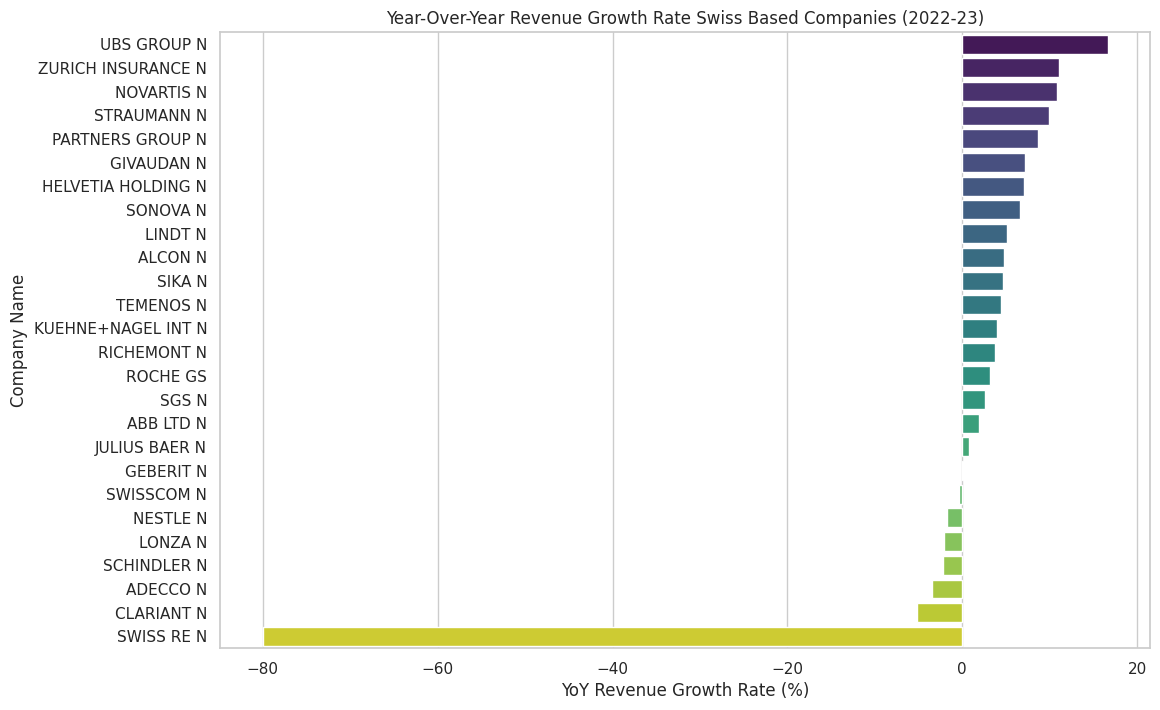

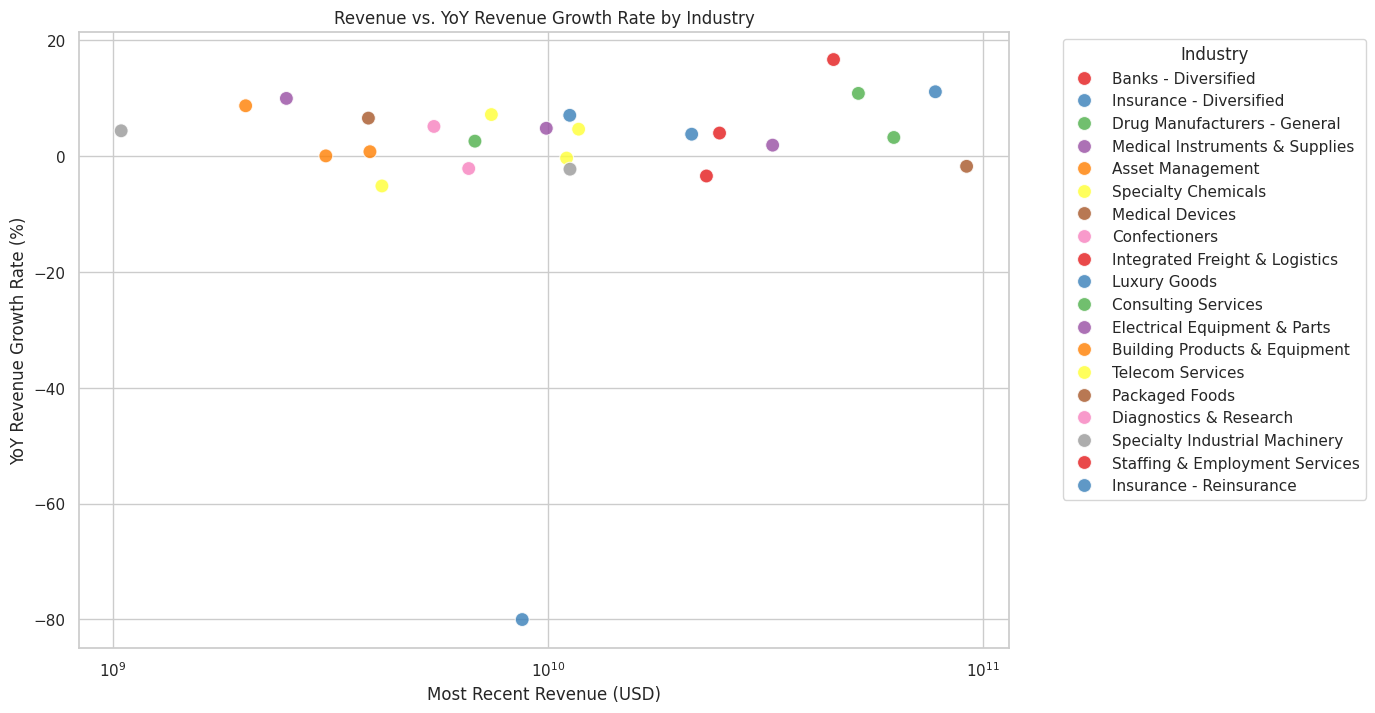

<ipython-input-16-977b9867ddd7>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='YoY Revenue Growth Rate (%)', y='Industry', palette="coolwarm")


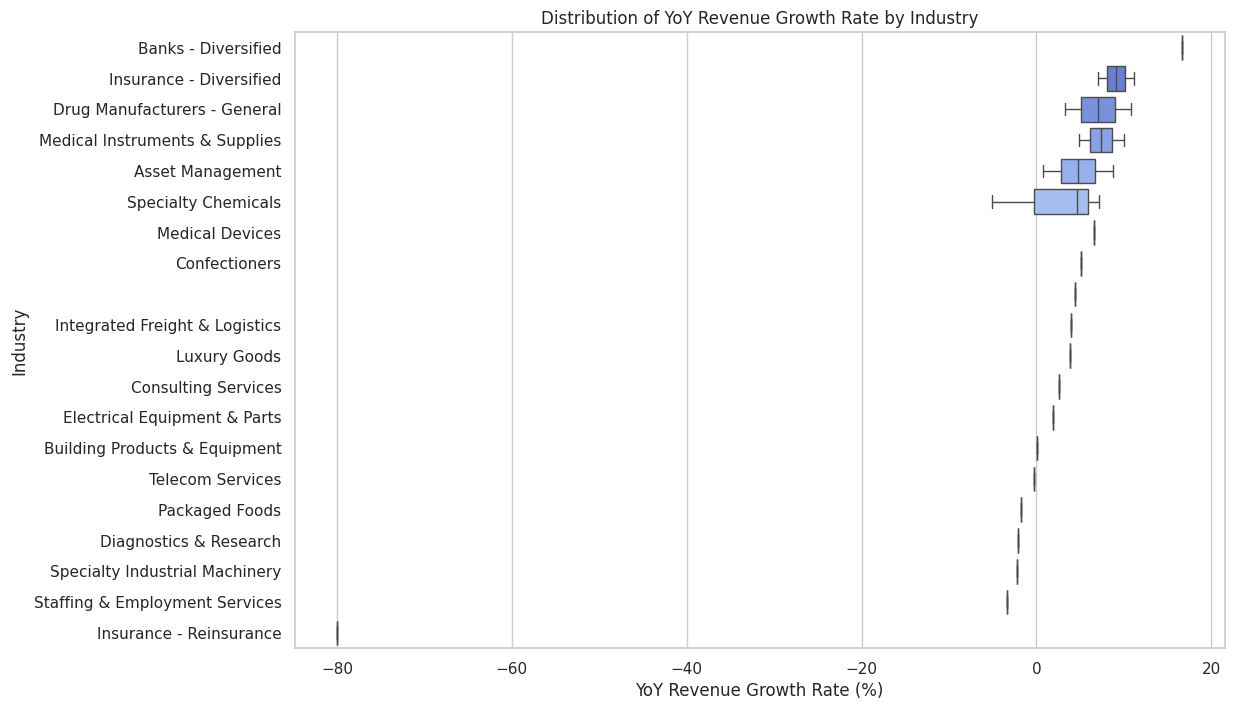

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn style for advanced visualization
sns.set(style="whitegrid")

# Sample data preparation (use the data prepared in the previous steps)
companies = [
    # Swiss Companies with Market Cap, Revenue, Employees, PE Ratio, Products
    'NESN.SW',  # Nestlé - Market Cap: 340B USD, Revenue: 95B USD, Employees: 270,000, PE Ratio: 25, Products: Food & Beverages
    'ROG.SW',   # Roche Holding - Market Cap: 250B USD, Revenue: 70B USD, Employees: 100,000, PE Ratio: 21, Products: Pharmaceuticals & Diagnostics
    'NOVN.SW',  # Novartis - Market Cap: 200B USD, Revenue: 53B USD, Employees: 100,000, PE Ratio: 20, Products: Pharmaceuticals & Gene Therapies
    'ZURN.SW',  # Zurich Insurance Group - Market Cap: 70B USD, Revenue: 50B USD, Employees: 56,000, PE Ratio: 12, Products: Insurance & Asset Management
    'UBSG.SW',  # UBS Group - Market Cap: 60B USD, Revenue: 35B USD, Employees: 72,000, PE Ratio: 9, Products: Banking & Wealth Management
    'ABBN.SW',  # ABB Ltd - Market Cap: 60B USD, Revenue: 30B USD, Employees: 105,000, PE Ratio: 18, Products: Robotics & Automation
    'CFR.SW',   # Cie Financière Richemont - Market Cap: 60B USD, Revenue: 20B USD, Employees: 35,000, PE Ratio: 32, Products: Luxury Goods & Jewelry
    'ALC.SW',   # Alcon - Market Cap: 40B USD, Revenue: 8B USD, Employees: 24,000, PE Ratio: 40, Products: Eye Care & Surgical Products
    'GIVN.SW',  # Givaudan - Market Cap: 40B USD, Revenue: 7B USD, Employees: 16,000, PE Ratio: 35, Products: Flavors & Fragrances
    'SREN.SW',  # Swiss Re - Market Cap: 30B USD, Revenue: 40B USD, Employees: 14,000, PE Ratio: 11, Products: Reinsurance
    'LONN.SW',  # Lonza Group - Market Cap: 50B USD, Revenue: 6B USD, Employees: 17,000, PE Ratio: 25, Products: Biotech Solutions & Manufacturing
    'SCMN.SW',  # Swisscom - Market Cap: 30B USD, Revenue: 12B USD, Employees: 19,000, PE Ratio: 16, Products: Telecommunications
    'PGHN.SW',  # Partners Group - Market Cap: 25B USD, Revenue: 2B USD, Employees: 1,800, PE Ratio: 22, Products: Private Equity & Asset Management
    'GEBN.SW',  # Geberit - Market Cap: 20B USD, Revenue: 4B USD, Employees: 12,000, PE Ratio: 30, Products: Sanitary Products
    'SIKA.SW',  # Sika - Market Cap: 40B USD, Revenue: 10B USD, Employees: 25,000, PE Ratio: 33, Products: Construction Chemicals
    'BAER.SW',  # Julius Baer Group - Market Cap: 15B USD, Revenue: 4B USD, Employees: 6,700, PE Ratio: 13, Products: Private Banking
    'SCHN.SW',  # Schindler Holding - Market Cap: 20B USD, Revenue: 12B USD, Employees: 69,000, PE Ratio: 18, Products: Elevators & Escalators
    'SGSN.SW',  # SGS - Market Cap: 20B USD, Revenue: 7B USD, Employees: 97,000, PE Ratio: 28, Products: Inspection & Certification
    'LOGN.SW',  # Logitech International - Market Cap: 10B USD, Revenue: 5B USD, Employees: 7,000, PE Ratio: 17, Products: Computer Accessories
    'CSGN.SW',  # Credit Suisse - Market Cap: 10B USD, Revenue: 20B USD, Employees: 50,000, PE Ratio: N/A, Products: Banking & Investment
    'ADEN.SW',  # Adecco Group - Market Cap: 8B USD, Revenue: 25B USD, Employees: 30,000, PE Ratio: 11, Products: Staffing & HR Solutions
    'LISN.SW',  # Lindt & Sprüngli - Market Cap: 25B USD, Revenue: 5B USD, Employees: 14,000, PE Ratio: 45, Products: Chocolate & Confectionery
    'SOON.SW',  # Sonova Holding - Market Cap: 20B USD, Revenue: 4B USD, Employees: 17,000, PE Ratio: 26, Products: Hearing Aids
    'STMN.SW',  # Straumann Holding - Market Cap: 20B USD, Revenue: 2B USD, Employees: 9,000, PE Ratio: 35, Products: Dental Implants
    'TEMN.SW',  # Temenos - Market Cap: 8B USD, Revenue: 1B USD, Employees: 4,000, PE Ratio: 20, Products: Banking Software
    'HELN.SW',  # Helvetia Holding - Market Cap: 5B USD, Revenue: 10B USD, Employees: 11,000, PE Ratio: 8, Products: Insurance
    # 'BALN.SW',  # Baloise Holding - Market Cap: 7B USD, Revenue: 9B USD, Employees: 7,500, PE Ratio: 9, Products: Insurance & Pensions
    'CLN.SW',   # Clariant - Market Cap: 5B USD, Revenue: 4B USD, Employees: 13,000, PE Ratio: 18, Products: Specialty Chemicals
    'KNIN.SW',  # Kuehne + Nagel - Market Cap: 30B USD, Revenue: 30B USD, Employees: 79,000, PE Ratio: 15, Products: Logistics & Freight
    # 'DUFN.SW',  # Dufry - Market Cap: 5B USD, Revenue: 7B USD, Employees: 20,000, PE Ratio: 12, Products: Travel Retail
]

# Initialize a list to store data
data = []

for ticker in companies:
    try:
        stock = yf.Ticker(ticker)
        # Fetch company info for name and industry
        company_info = stock.info
        company_name = company_info.get("shortName", "N/A")
        industry = company_info.get("industry", "N/A")

        # Fetch annual financial data as a DataFrame
        annual_financials = stock.financials

        # Get Revenue for the last two years and the corresponding years
        recent_revenue = annual_financials.loc['Total Revenue'][:2]
        recent_years = recent_revenue.index[:2]

        # Calculate Revenue Growth Rate if there are at least two years of data
        if len(recent_revenue) >= 2:
            revenue_growth_rate = ((recent_revenue.iloc[0] - recent_revenue.iloc[1]) / recent_revenue.iloc[1]) * 100
        else:
            revenue_growth_rate = None

        # Append to data list
        data.append({
            'Ticker': ticker,
            'Company Name': company_name,
            'Industry': industry,
            'Most Recent Revenue': recent_revenue.iloc[0] if len(recent_revenue) > 0 else None,
            'Previous Year Revenue': recent_revenue.iloc[1] if len(recent_revenue) > 1 else None,
            'YoY Revenue Growth Rate (%)': revenue_growth_rate
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Drop rows with missing growth rates for visualizations
df = df.dropna(subset=['YoY Revenue Growth Rate (%)'])

# Sort by 'YoY Revenue Growth Rate (%)' in descending order
df = df.sort_values(by='YoY Revenue Growth Rate (%)', ascending=False)

### Visualization 1: Bar Chart of YoY Revenue Growth Rate
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='YoY Revenue Growth Rate (%)', y='Company Name', palette="viridis")
plt.title('Year-Over-Year Revenue Growth Rate Swiss Based Companies (2022-23)')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Company Name')
plt.show()

### Visualization 2: Scatter Plot of Revenue vs. YoY Growth Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Most Recent Revenue', y='YoY Revenue Growth Rate (%)', hue='Industry', palette="Set1", s=100, edgecolor="w", alpha=0.8)
plt.title('Revenue vs. YoY Revenue Growth Rate by Industry')
plt.xlabel('Most Recent Revenue (USD)')
plt.ylabel('YoY Revenue Growth Rate (%)')
plt.xscale('log')  # Log scale to manage large revenue range
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Visualization 3: Box Plot of YoY Revenue Growth by Industry
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='YoY Revenue Growth Rate (%)', y='Industry', palette="coolwarm")
plt.title('Distribution of YoY Revenue Growth Rate by Industry')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Industry')
plt.show()

In [17]:
pip install pandas matplotlib seaborn yfinance pandasdmx wbdata